In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
from numpy import where

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

from scipy.sparse import hstack, vstack

from prettytable import PrettyTable
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Dataset/Reviews.csv"


In [ ]:
df = pd.read_csv(path, delimiter=',', engine='python', encoding='utf-8')
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df = df[:7000]

In [ ]:
print('No. of datapoints/rows: {}'.format(df.shape[0]))
print('No. of features/columns: {}'.format(df.shape[1]))

No. of datapoints/rows: 7000
No. of features/columns: 10


In [ ]:
print("Feature names: \n{}".format(df.columns))

Feature names: 
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [ ]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      7000 non-null   int64 
 1   ProductId               7000 non-null   object
 2   UserId                  7000 non-null   object
 3   ProfileName             7000 non-null   object
 4   HelpfulnessNumerator    7000 non-null   int64 
 5   HelpfulnessDenominator  7000 non-null   int64 
 6   Score                   7000 non-null   int64 
 7   Time                    7000 non-null   int64 
 8   Summary                 7000 non-null   object
 9   Text                    7000 non-null   object
dtypes: int64(5), object(5)
memory usage: 547.0+ KB


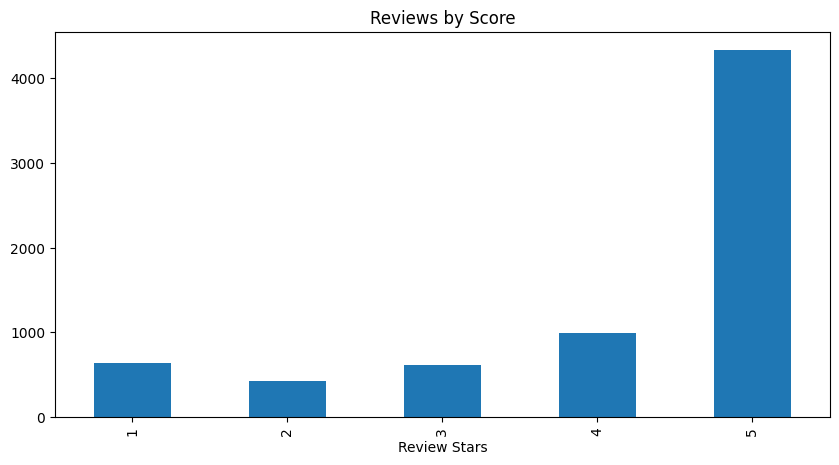

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Reviews by Score', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
df['Score'].value_counts()

5    4334
4     995
1     640
3     610
2     421
Name: Score, dtype: int64

In [ ]:
duplicates = df[df.duplicated(subset=['ProductId', 'UserId', 'ProfileName', 'Time', 'Text'], keep=False)]
duplicates

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
2334,2335,B0001FQVCK,A5D06XJHDXK75,C. Po,3,3,5,1190592000,Chocolate Italian kisses - need I say more?,My family has been in love with Baci's ever si...
2336,2337,B0001FQVCK,A5D06XJHDXK75,C. Po,1,1,5,1190592000,"Baci's are pure heaven - great gift, stocking ...",My family has been in love with Baci's ever si...
2613,2614,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,4,4,4,1300579200,lots of uses for this green tea...,lots of uses for this green tea...<br /><br />...
2636,2637,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,3,4,2,1313107200,Way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2647,2648,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,0,0,2,1313107200,way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2653,2654,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,0,0,4,1300579200,quality lightly sweetened green tea powder,lots of uses for this green tea...<br /><br />...
2941,2942,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,7,11,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
2943,2944,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,2,4,1,1310774400,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...


In [ ]:
df.duplicated(subset=['ProductId', 'UserId', 'ProfileName', 'Time', 'Text'], keep=False).value_counts()

False    6984
True       16
dtype: int64

In [ ]:
duplicates[duplicates['ProductId']=='B0016FY6H6']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2613,2614,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,4,4,4,1300579200,lots of uses for this green tea...,lots of uses for this green tea...<br /><br />...
2636,2637,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,3,4,2,1313107200,Way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2647,2648,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,0,0,2,1313107200,way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2653,2654,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,0,0,4,1300579200,quality lightly sweetened green tea powder,lots of uses for this green tea...<br /><br />...


In [ ]:

df.shape

(7000, 10)

In [ ]:
df.drop_duplicates(subset=['ProductId', 'UserId', 'ProfileName', 'Time', 'Text'], keep='first', inplace=True)
df.shape

(6992, 10)

In [ ]:
df[df["HelpfulnessNumerator"] > df["HelpfulnessDenominator"]]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [ ]:
print(f"No. of Datapoints BEFORE discarding : {df.shape[0]}")

df = df[df["HelpfulnessNumerator"] <= df["HelpfulnessDenominator"]]

print(f"No. of Datapoints AFTER discarding : {df.shape[0]}")

No. of Datapoints BEFORE discarding : 6992
No. of Datapoints AFTER discarding : 6992


In [ ]:
print("Positive reviews:", df[df['Score']>3].shape[0])
print("Negative reviews:", df[df['Score']<=3].shape[0])

Positive reviews: 5325
Negative reviews: 1667


In [ ]:
df['Review'] = [1 if x>3 else 0 for x in df['Score']]
df.head(15)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,1


In [ ]:
print("Negative values with scores 1, 2 and 3:", len(df[df['Review']==0]))
print("Positive values with score 4 and 5:", len(df[df['Review']==1]))

Negative values with scores 1, 2 and 3: 1667
Positive values with score 4 and 5: 5325


In [ ]:
df['WordCount'] = df['Text'].apply(lambda x: len(x.split()))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review,WordCount
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,94
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,27


In [ ]:
df['CharacterCount'] = df['Text'].apply(lambda x: len(x))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review,WordCount,CharacterCount
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,48,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,31,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,94,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,41,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,27,140


In [ ]:
df["HelpfulnessPercentage"] = df[["HelpfulnessNumerator","HelpfulnessDenominator"]].apply(lambda x: ((x[0]/x[1])*100.0) if x[1] else 0.0, axis=1)
df.head(-10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review,WordCount,CharacterCount,HelpfulnessPercentage
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,48,263,100.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,31,190,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,94,509,100.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,41,219,100.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,27,140,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985,6986,B004K30HO2,A1RZFGQ26EUNQN,maslatte,0,0,4,1322611200,Awesome,I have been using the DisposaKups for about 2 ...,1,72,416,0.0
6986,6987,B004K30HO2,A129U7FBX554VS,Beth McCrary,0,0,5,1322179200,Great alternative to the single cups.,These worked great for us. We are able to reu...,1,29,156,0.0
6987,6988,B004K30HO2,A3N2ME4VOFRS07,retired &amp; happy,0,0,5,1321315200,convenient & easy,The DisposaKups are so easy and convenient to ...,1,38,199,0.0
6988,6989,B004K30HO2,A2YZA421D3YOEI,"N. Berry ""kindle user""",0,0,5,1321228800,good stuff,shipped in great shape. I gave these to my so...,1,38,189,0.0


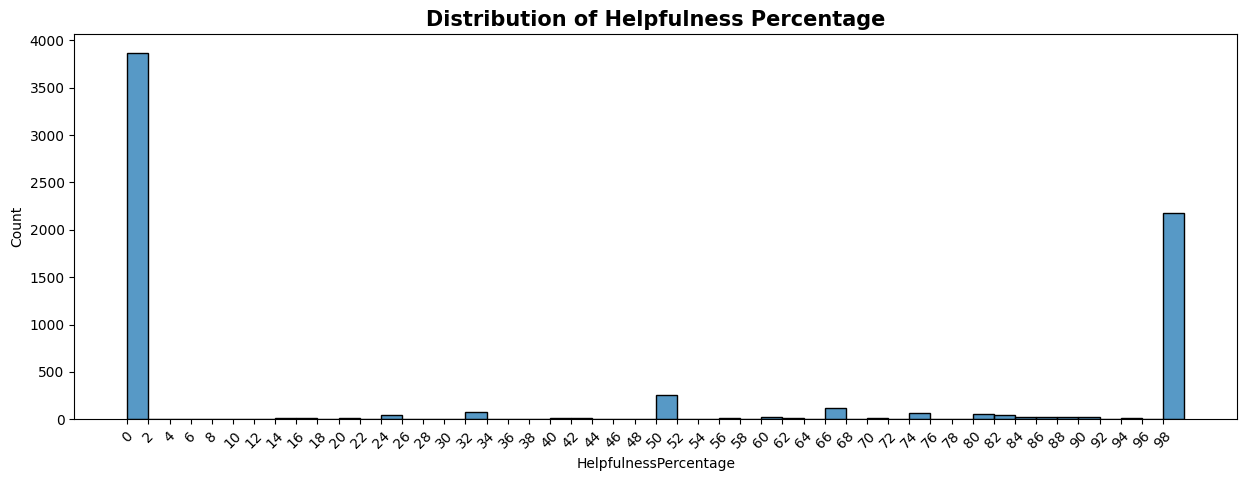

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.histplot(data=df["HelpfulnessPercentage"], bins=50)
plt.title("Distribution of Helpfulness Percentage",fontweight='bold', fontsize=15)
plt.xticks(range(0,100,2), rotation=45)
plt.show()

In [ ]:
df.loc[df["HelpfulnessPercentage"] >= 75, 'HelpfulnessIndicator'] = 'Useful'
df.loc[(df["HelpfulnessPercentage"] > 40) & (df["HelpfulnessPercentage"] < 75), 'HelpfulnessIndicator'] = 'Intermediate'
df.loc[(df["HelpfulnessPercentage"] > 0) & (df["HelpfulnessPercentage"] <= 40), 'HelpfulnessIndicator'] = 'Not Useful'
df.loc[df["HelpfulnessPercentage"] == 0, 'HelpfulnessIndicator'] = 'Not Available'
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,48,263,100.0,Useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,31,190,0.0,Not Available
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,94,509,100.0,Useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,41,219,100.0,Useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,27,140,0.0,Not Available


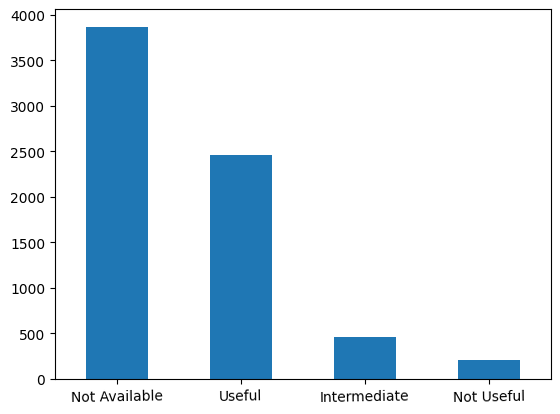


Count of Usefulness of Reviews:
Not Available    3871
Useful           2455
Intermediate      463
Not Useful        203
Name: HelpfulnessIndicator, dtype: int64


In [ ]:
df.HelpfulnessIndicator.value_counts().plot(kind='bar', rot=1.0)
plt.show()
print("\nCount of Usefulness of Reviews:")
print(df.HelpfulnessIndicator.value_counts())

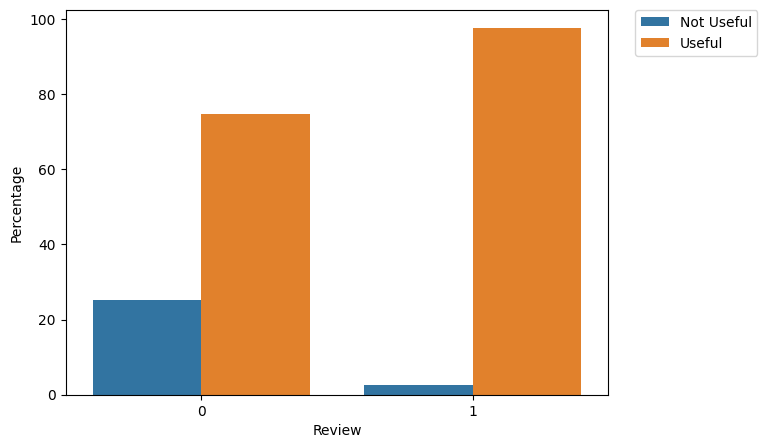

,Review,HelpfulnessIndicator,Percentage
0,0,Useful,74.708819
1,0,Not Useful,25.291181
2,1,Useful,97.520661
3,1,Not Useful,2.479339


In [ ]:
df_temp = df[(df["HelpfulnessIndicator"]!= "Not Available") & (df["HelpfulnessIndicator"]!= "Intermediate")]
df_temp_1 = df_temp["HelpfulnessIndicator"].groupby(df_temp["Review"]).value_counts(normalize=True)
df_temp_1 = df_temp_1*100
df_temp_1 = df_temp_1.rename("Percentage").reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=df_temp_1, x="Review", y="Percentage", hue="HelpfulnessIndicator", hue_order=["Not Useful","Useful"]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.show()
print()
df_temp_1

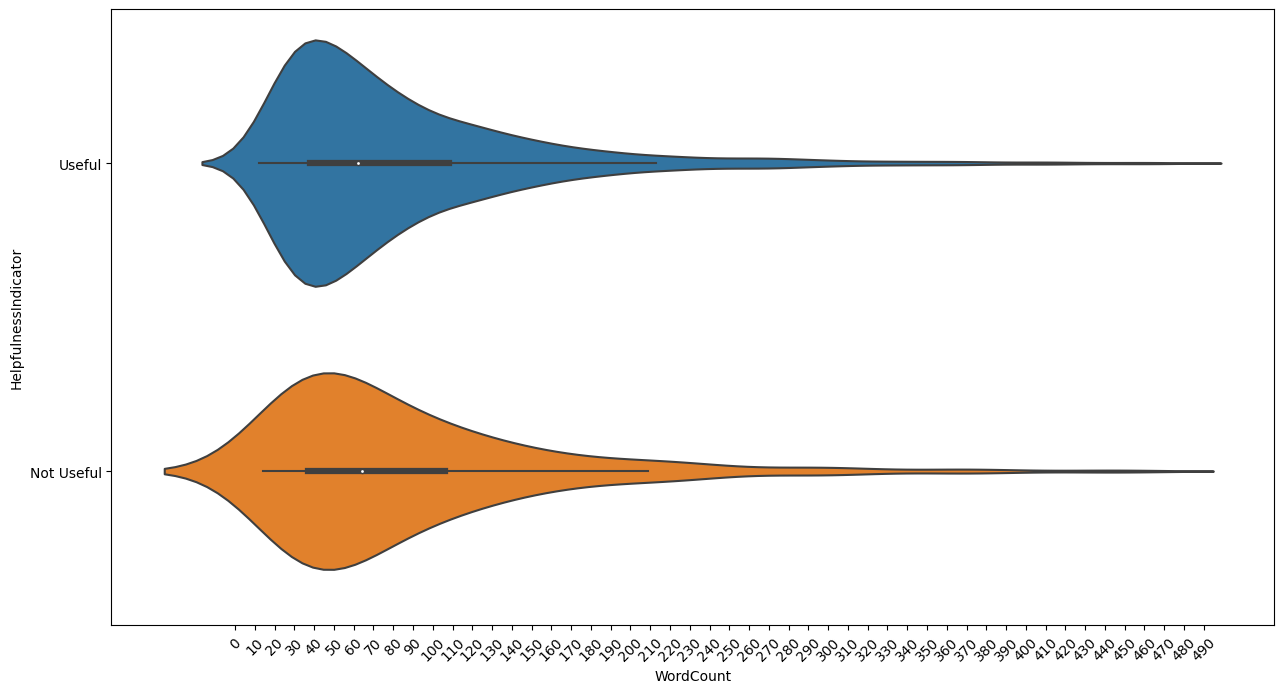

,count,mean,std,min,25%,50%,75%,max
HelpfulnessIndicator,,,,,,,,
Not Useful,200.0,86.155,71.859515,14.0,37.0,64.0,106.25,445.0
Useful,2441.0,84.161,68.408428,12.0,38.0,62.0,108.00,470.0


In [ ]:
temp_df_useful_nonuseful_500wc = df[(df["HelpfulnessIndicator"]!= "Not Available") & (df["HelpfulnessIndicator"]!= "Intermediate") & (df["WordCount"]<500)]
plt.figure(figsize=(15,8))
sns.violinplot(x='WordCount', y='HelpfulnessIndicator', data=temp_df_useful_nonuseful_500wc, orient="h")
plt.xticks(range(0,500,10), rotation=45)
plt.show()
print()

temp_df_useful_nonuseful_500wc["WordCount"].groupby(temp_df_useful_nonuseful_500wc["HelpfulnessIndicator"]).describe()

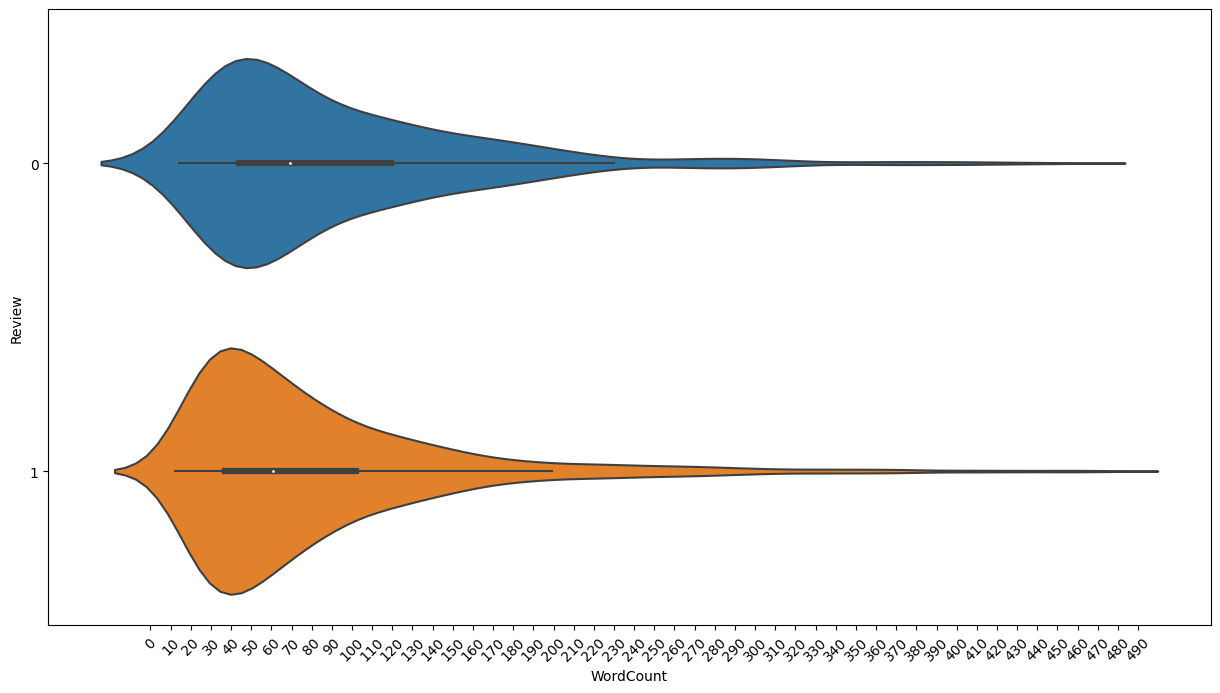

,count,mean,std,min,25%,50%,75%,max
Review,,,,,,,,
0,595.0,91.415126,69.118116,14.0,44.0,69.0,119.5,445.0
1,2046.0,82.246334,68.409646,12.0,37.0,61.0,102.0,470.0


In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x='WordCount', y='Review', data=temp_df_useful_nonuseful_500wc, orient="h")
plt.xticks(range(0,500,10), rotation=45)
plt.show()
print()
temp_df_useful_nonuseful_500wc["WordCount"].groupby(temp_df_useful_nonuseful_500wc["Review"]).describe()

In [ ]:
import re
def clean_text(reviews_df):
  cleaned_reviews_df = []
  cleaned_reviews = ""
  for text in reviews_df:
    text = text.lower() # Converting to lowercase
    pattern = re.compile('<.*?>')
    text = re.sub(pattern, ' ', text) # Removing HTML tags
    text = re.sub(r'[?|!|\'|"|#]', r'', text)
    text = re.sub(r'[.|,|)|(|\|/]', r' ', text) # Removing Punctuations
    words = [word for word in text.split() if word not in stopwords.words('english')] # Removing stopwords
    cleaned_reviews_df.append(words)
    cleaned_reviews = list(map(' '.join, cleaned_reviews_df))
  return cleaned_reviews

In [ ]:
df['CleanedText'] = clean_text(df['Text'])
df['CleanedText'][25:90]

25    product received advertised twizzlers strawber...
26          candy red flavor plan chewy would never buy
27    glad amazon carried batteries hard time findin...
28    got mum diabetic needs watch sugar intake fath...
29    dont know cactus tequila unique combination in...
                            ...                        
85    three dogs love food bought specifically one d...
86    dog ton allergies environmental food prescript...
87    shepherd collie mix ibs vet recommended limite...
88    natural balance dry dog food lamb meal brown r...
89    great food love idea one food ages & breeds ît...
Name: CleanedText, Length: 65, dtype: object

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,48,263,100.0,Useful,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,31,190,0.0,Not Available,product arrived labeled jumbo salted peanuts p...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,94,509,100.0,Useful,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,41,219,100.0,Useful,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,27,140,0.0,Not Available,great taffy great price wide assortment yummy ...


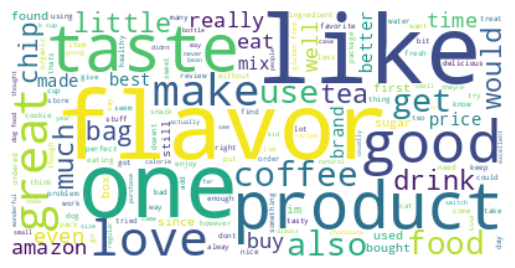

In [ ]:
all_text = " ".join(review for review in df['CleanedText'])

wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

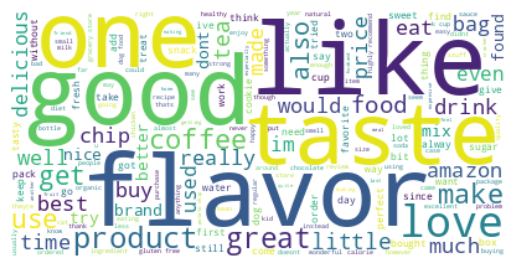

In [ ]:
positive_text = " ".join(review for review in df['CleanedText'][df['Review']==1])

wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color="white").generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

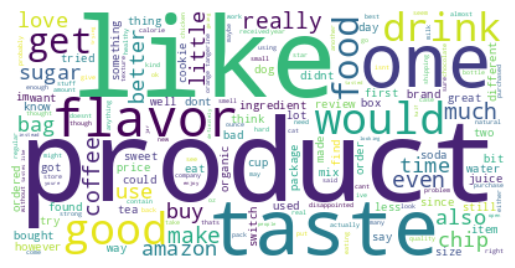

In [ ]:
negative_text = " ".join(review for review in df['CleanedText'][df['Review']==0])

wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color="white").generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordfreq = {}
tokens = nltk.word_tokenize(negative_text)
for t in tokens:
    if t not in wordfreq.keys():
        wordfreq[t] = 1
    else:
        wordfreq[t] += 1
print(wordfreq)

{'product': 597, 'arrived': 54, 'labeled': 6, 'jumbo': 7, 'salted': 3, 'peanuts': 13, 'actually': 107, 'small': 96, 'sized': 11, 'unsalted': 3, 'sure': 119, 'error': 6, 'vendor': 10, 'intended': 7, 'represent': 1, 'looking': 103, 'secret': 4, 'ingredient': 75, 'robitussin': 1, 'believe': 50, 'found': 154, 'got': 149, 'addition': 18, 'root': 6, 'beer': 15, 'extract': 33, 'ordered': 128, 'good': 507, 'made': 184, 'cherry': 15, 'soda': 188, 'flavor': 485, 'medicinal': 6, 'cats': 53, 'happily': 4, 'eating': 89, 'felidae': 17, 'platinum': 3, 'two': 153, 'years': 59, 'new': 84, 'bag': 186, 'shape': 11, 'food': 360, 'different': 130, 'tried': 239, 'first': 236, 'put': 91, 'bowls': 8, 'sit': 5, 'full': 62, 'kitties': 1, 'touch': 13, 'ive': 179, 'noticed': 43, 'similar': 39, 'reviews': 105, 'related': 6, 'formula': 39, 'changes': 4, 'past': 29, 'unfortunately': 59, 'need': 81, 'find': 177, 'eat': 196, 'love': 200, 'watching': 3, 'tv': 2, 'movies': 2, 'sweet': 167, 'like': 939, 'transfer': 3, 'z

In [ ]:
import heapq
most_freq = heapq.nlargest(400, wordfreq, key=wordfreq.get)
print(most_freq)

['like', 'taste', 'product', 'would', 'one', 'good', 'flavor', 'food', 'dont', 'much', 'really', 'juice', 'drink', 'sugar', 'get', 'coffee', 'buy', 'even', 'better', 'water', 'tea', ':', '-', 'im', 'orange', 'chips', 'amazon', 'also', 'tried', 'little', 'first', 'time', '%', 'try', 'bad', '3', '$', 'box', 'price', 'make', 'ingredients', 'love', 'great', 'mix', 'eat', 'use', 'soda', 'something', 'still', '2', 'think', 'know', 'bag', 'well', 'made', 'ive', 'bought', 'find', 'way', 'chocolate', 'sweet', 'want', 'didnt', 'thought', 'hot', 'could', 'tastes', 'order', 'however', 'found', 'flavors', 'two', 'best', 'got', 'switch', 'products', 'used', 'bit', 'less', 'say', '4', 'since', 'organic', '1', 'different', 'doesnt', 'brand', 'natural', 'ordered', 'fruit', '--', 'cup', 'size', 'cant', '5', 'sure', 'going', 'many', 'though', 'store', 'tangerine', 'tasted', ';', '8', 'disappointed', 'never', 'go', 'per', 'give', 'money', 'corn', 'oz', 'enough', 'free', 'said', 'may', 'away', 'calories', 

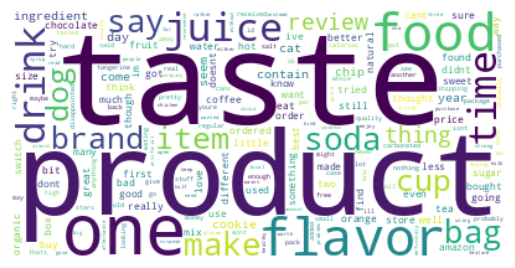

In [ ]:
top_400_words = " ".join(word for word in most_freq)
wordcloud_top_400 = WordCloud(background_color="white").generate(top_400_words)
plt.imshow(wordcloud_top_400, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
snow = nltk.stem.SnowballStemmer('english')
final_X = []
for text in df['CleanedText']:
  words = [snow.stem(word) for word in text.split()]
  final_X.append(words)
final_X[:10]

[['bought',
  'sever',
  'vital',
  'can',
  'dog',
  'food',
  'product',
  'found',
  'good',
  'qualiti',
  'product',
  'look',
  'like',
  'stew',
  'process',
  'meat',
  'smell',
  'better',
  'labrador',
  'finicki',
  'appreci',
  'product',
  'better'],
 ['product',
  'arriv',
  'label',
  'jumbo',
  'salt',
  'peanut',
  'peanut',
  'actual',
  'small',
  'size',
  'unsalt',
  'sure',
  'error',
  'vendor',
  'intend',
  'repres',
  'product',
  'jumbo'],
 ['confect',
  'around',
  'centuri',
  'light',
  'pillowi',
  'citrus',
  'gelatin',
  'nut',
  '-',
  'case',
  'filbert',
  'cut',
  'tini',
  'squar',
  'liber',
  'coat',
  'powder',
  'sugar',
  'tini',
  'mouth',
  'heaven',
  'chewi',
  'flavor',
  'high',
  'recommend',
  'yummi',
  'treat',
  'familiar',
  'stori',
  'c',
  'lewi',
  'lion',
  'witch',
  'wardrob',
  '-',
  'treat',
  'seduc',
  'edmund',
  'sell',
  'brother',
  'sister',
  'witch'],
 ['look',
  'secret',
  'ingredi',
  'robitussin',
  'believ',

In [ ]:
final_y = df['Review']

In [ ]:
stemmed_X = []
for row in final_X:
    sentence = ''
    for word in row:
        sentence = sentence + ' ' + word
    stemmed_X.append(sentence.strip())

In [ ]:
stemmed_X[:5]

['bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better',
 'product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo',
 'confect around centuri light pillowi citrus gelatin nut - case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori c lewi lion witch wardrob - treat seduc edmund sell brother sister witch',
 'look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin',
 'great taffi great price wide assort yummi taffi deliveri quick taffi lover deal']

In [ ]:
count_vect = CountVectorizer(max_features=100)
bow_X = count_vect.fit_transform(stemmed_X)
final_X = bow_X
print(final_X[:5])

  (0, 7)	1
  (0, 23)	1
  (0, 33)	1
  (0, 69)	3
  (0, 34)	1
  (0, 39)	1
  (0, 51)	1
  (0, 49)	1
  (0, 5)	2
  (1, 69)	2
  (2, 83)	1
  (2, 32)	1
  (2, 42)	1
  (2, 72)	1
  (3, 34)	1
  (3, 39)	1
  (3, 51)	1
  (3, 32)	1
  (3, 45)	1
  (3, 40)	1
  (3, 64)	1
  (3, 54)	1
  (3, 79)	1
  (4, 41)	2
  (4, 68)	1


In [ ]:
print("Count of final_X:")
print(final_X.shape[0])
print()
print("Count of final_y:")
print(final_y.value_counts())

Count of final_X:
6992

Count of final_y:
1    5325
0    1667
Name: Review, dtype: int64


In [ ]:
pca = PCA(n_components = 2)

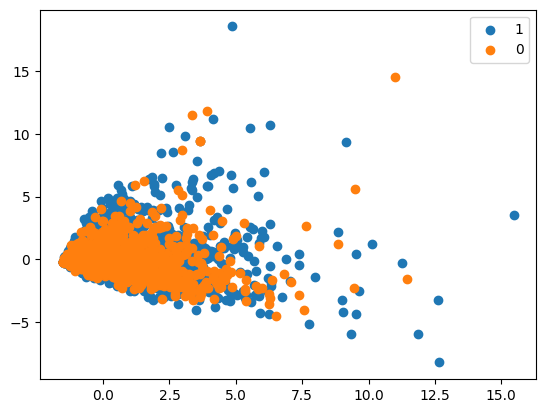

In [ ]:
PCA_X = pca.fit_transform(final_X.toarray())

counter = Counter(final_y)
for label, _ in counter.items():
 row_ix = where(final_y == label)[0]
 plt.scatter(PCA_X[row_ix, 0], PCA_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
oversample = SMOTE()

X_resampled, y_resampled = oversample.fit_resample(final_X, final_y)
X_resampled.shape

(10650, 100)

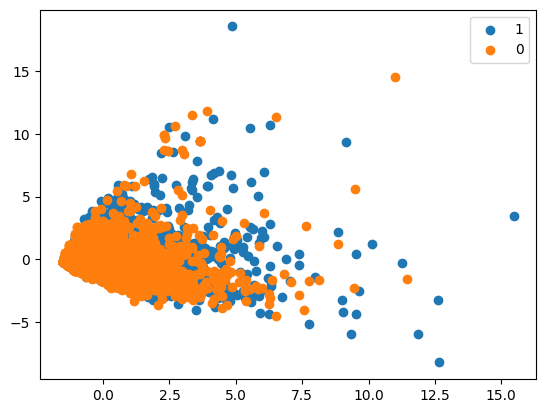

In [ ]:
PCA_SMOTE_X = pca.transform(X_resampled.toarray())

for label, _ in counter.items():
 row_ix = where(y_resampled == label)[0]
 plt.scatter(PCA_SMOTE_X[row_ix, 0], PCA_SMOTE_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
print("Shape of oversampled X:")
print(X_resampled.shape)
print()
print("Shape of oversampled y:")
print(y_resampled.shape)

Shape of oversampled X:
(10650, 100)

Shape of oversampled y:
(10650,)


In [ ]:
df['StemmedText'] = stemmed_X
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator,CleanedText,StemmedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,48,263,100.0,Useful,bought several vitality canned dog food produc...,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,31,190,0.0,Not Available,product arrived labeled jumbo salted peanuts p...,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,94,509,100.0,Useful,confection around centuries light pillowy citr...,confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,41,219,100.0,Useful,looking secret ingredient robitussin believe f...,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,27,140,0.0,Not Available,great taffy great price wide assortment yummy ...,great taffi great price wide assort yummi taff...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8520, 100)
(2130, 100)
(8520,)
(2130,)


In [ ]:
lr = LogisticRegression(C=1e5)
result = lr.fit(X=X_train, y=y_train)
predictions = result.predict(X_test)

In [ ]:
predictions[:5]

array([1, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy1 = accuracy_score(y_test, predictions)
precision1 = precision_score(y_test, predictions)
recall1 = recall_score(y_test, predictions)
f1_score1 = f1_score(y_test, predictions)


In [ ]:
print(accuracy1)

0.8131455399061033


In [ ]:
print(precision1)

0.8458333333333333


In [ ]:
print(recall1)

0.7645951035781544


In [ ]:
print(f1_score1)

0.8031651829871415


In [ ]:
training_predictions = result.predict(X_train)
training_accuracy1 = accuracy_score(y_train, training_predictions)
print(training_accuracy1)

0.8002347417840375


In [ ]:
print(metrics.classification_report(y_test, predictions, target_names = ["positive", "negative"]))

              precision    recall  f1-score   support

    positive       0.79      0.86      0.82      1068
    negative       0.85      0.76      0.80      1062

    accuracy                           0.81      2130
   macro avg       0.82      0.81      0.81      2130
weighted avg       0.82      0.81      0.81      2130



In [ ]:
cm1 = confusion_matrix(y_test, predictions, labels=lr.classes_)
print(cm1)

[[920 148]
 [250 812]]


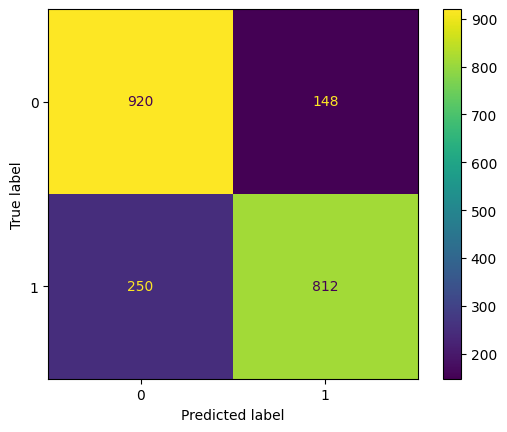

In [ ]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=lr.classes_)
disp1.plot()
plt.show()

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator,CleanedText,StemmedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,48,263,100.0,Useful,bought several vitality canned dog food produc...,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,31,190,0.0,Not Available,product arrived labeled jumbo salted peanuts p...,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,94,509,100.0,Useful,confection around centuries light pillowy citr...,confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,41,219,100.0,Useful,looking secret ingredient robitussin believe f...,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,27,140,0.0,Not Available,great taffy great price wide assortment yummy ...,great taffi great price wide assort yummi taff...


In [ ]:
final_y.head()

0    1
1    0
2    1
3    0
4    1
Name: Review, dtype: int64

In [ ]:
multifeature_X = df[['WordCount',	'CharacterCount',	'HelpfulnessPercentage',	'HelpfulnessIndicator', 'StemmedText']]
multifeature_X.head()

,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator,StemmedText
0,48,263,100.0,Useful,bought sever vital can dog food product found ...
1,31,190,0.0,Not Available,product arriv label jumbo salt peanut peanut a...
2,94,509,100.0,Useful,confect around centuri light pillowi citrus ge...
3,41,219,100.0,Useful,look secret ingredi robitussin believ found go...
4,27,140,0.0,Not Available,great taffi great price wide assort yummi taff...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(multifeature_X, final_y, test_size=0.2, random_state=42)

In [ ]:
X_train[:5]

,WordCount,CharacterCount,HelpfulnessPercentage,HelpfulnessIndicator,StemmedText
4493,187,1021,0.0,Not Available,im coffe expert know good tast coffe drink cup...
5991,35,208,100.0,Useful,anoth great hit coffe master one rich dark cho...
5596,38,204,0.0,Not Available,weve drink yuban sinc 1979 find conveni way ge...
3157,23,136,100.0,Useful,first purchas water tast great bottl thicker a...
6583,64,324,100.0,Useful,cant stand gu anymor found feel like got much ...


In [ ]:
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train['HelpfulnessIndicator'].to_numpy().reshape(-1, 1))
X_test_encoded = encoder.transform(X_test['HelpfulnessIndicator'].to_numpy().reshape(-1, 1))

In [ ]:
print(X_train_encoded[:5])
print(X_train_encoded.shape)

  (0, 1)	1.0
  (1, 3)	1.0
  (2, 1)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
(5593, 4)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['WordCount',	'CharacterCount',	'HelpfulnessPercentage']])
X_test_scaled = scaler.transform(X_test[['WordCount',	'CharacterCount',	'HelpfulnessPercentage']])

In [ ]:
print(X_train_scaled[:5])
print(X_train_scaled.shape)

[[ 1.4823434   1.4357225  -0.84913738]
 [-0.58580897 -0.52587675  1.3245354 ]
 [-0.54499017 -0.53552792 -0.84913738]
 [-0.74908416 -0.69959772  1.3245354 ]
 [-0.19122727 -0.24599297  1.3245354 ]]
(5593, 3)


In [ ]:
vectorizer = CountVectorizer(max_features=100)
X_train_text = vectorizer.fit_transform(X_train['StemmedText'])
X_test_text = vectorizer.transform(X_test['StemmedText'])

In [ ]:
print(X_train_text[:1])
print(X_train_text.shape)

  (0, 44)	1
  (0, 15)	6
  (0, 48)	1
  (0, 39)	1
  (0, 85)	2
  (0, 25)	1
  (0, 19)	1
  (0, 32)	2
  (0, 61)	1
  (0, 54)	1
  (0, 49)	1
  (0, 37)	1
  (0, 60)	1
  (0, 67)	1
  (0, 46)	1
  (0, 66)	3
  (0, 3)	1
  (0, 52)	1
  (0, 62)	1
  (0, 18)	2
  (0, 20)	1
(5593, 100)


In [ ]:
X_train_combined = hstack((X_train_encoded, X_train_scaled, X_train_text))
X_test_combined = hstack((X_test_encoded, X_test_scaled, X_test_text))

In [ ]:
print(X_train_combined.shape)
print(X_test_combined.shape)

(5593, 107)
(1399, 107)


In [ ]:
combined_result = lr.fit(X=X_train_combined, y=y_train)
predictions_with_FE = combined_result.predict(X_test_combined)

In [ ]:
accuracy2 = accuracy_score(y_test, predictions_with_FE)
print("Accuracy:", accuracy2)
precision2 = precision_score(y_test, predictions_with_FE)
print("Precision Score:", precision2)
recall2 = recall_score(y_test, predictions_with_FE)
print("Recall Score:", recall2)
f1_score2 = f1_score(y_test, predictions_with_FE)
print("F1 Score:", f1_score2)

Accuracy: 0.8048606147248034
Precision Score: 0.8253706754530478
Recall Score: 0.9426152398871119
F1 Score: 0.8801054018445322


In [ ]:
training_predictions_with_FE = combined_result.predict(X_train_combined)
training_accuracy2 = accuracy_score(y_train, training_predictions_with_FE)
print(training_accuracy2)

0.8113713570534596


In [ ]:
print(metrics.classification_report(y_test, predictions_with_FE, target_names = ["positive", "negative"]))

              precision    recall  f1-score   support

    positive       0.67      0.37      0.48       336
    negative       0.83      0.94      0.88      1063

    accuracy                           0.80      1399
   macro avg       0.75      0.66      0.68      1399
weighted avg       0.79      0.80      0.78      1399



In [ ]:
cm2 = confusion_matrix(y_test, predictions_with_FE, labels=lr.classes_)
print(cm2)

[[ 124  212]
 [  61 1002]]


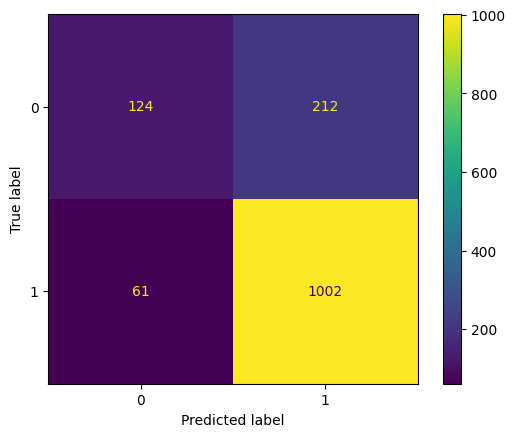

In [ ]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=lr.classes_)
disp2.plot()
plt.show()

In [ ]:
# Table:
comparison_table = PrettyTable(["Model", "Test Accuracy", "Train Accuracy", "Precision", "Recall", "F1 Score"])
comparison_table.add_row(["Logistic Regression with Text feature", round(accuracy1*100,2), round(training_accuracy1*100,2), round(precision1*100,2), round(recall1*100,2), round(f1_score1*100,2)])
comparison_table.add_row(["Logistic Regression with Feature Engineering", round(accuracy2*100,2), round(training_accuracy2*100,2), round(precision2*100,2), round(recall2*100,2), round(f1_score2*100,2)])
print(comparison_table)

+----------------------------------------------+---------------+----------------+-----------+--------+----------+
|                    Model                     | Test Accuracy | Train Accuracy | Precision | Recall | F1 Score |
+----------------------------------------------+---------------+----------------+-----------+--------+----------+
|    Logistic Regression with Text feature     |     81.31     |     80.02      |   84.58   | 76.46  |  80.32   |
| Logistic Regression with Feature Engineering |     80.49     |     81.14      |   82.54   | 94.26  |  88.01   |
+----------------------------------------------+---------------+----------------+-----------+--------+----------+


In [ ]:

print(y_train.shape)
print(y_test.shape)
X_with_FE = vstack((X_train_combined, X_test_combined))
y_with_FE = np.concatenate((y_train, y_test))
print(y_with_FE.shape)

In [ ]:
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)


rscv_result = search.fit(X_with_FE, y_with_FE)

print('Best Score: %s' % rscv_result.best_score_)